In [58]:

import numpy as np # linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import math

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

#  Data Science for Business Project

## Exploratory Data Analysis



In [59]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')
transactions = pd.read_csv('transactions.csv')
oil = pd.read_csv('oil.csv')
holidays_events = pd.read_csv('holidays_events.csv')

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [61]:
train = pd.merge(train, stores, how='left', on='store_nbr')

In [62]:
train_aux = train[['date', 'sales', 'onpromotion']].groupby('date').mean()
train_aux = train_aux.reset_index()
fig = go.Figure(data=go.Scatter(x=train_aux['date'], 
                                y=train_aux['sales'],
                                marker_color='red', text="sales"))
fig.update_layout({"title": f'Average Sales by date for all stores and products',
                   "xaxis": {"title":"Date"},
                   "yaxis": {"title":"Avg Unit Sold"},
                   "showlegend": False})
fig.show()

### Comments
* Increasing trend of the sales.
* In the last two years (since July 2015) the trend has been stable (almost stationary TS).
* By zooming in one can realize that there is a seasonality every 7 days, same pattern (during the weekends higher sales). The peak of the weekly sesoanlity is on Sundays/Saturdays.

In [63]:
fig = px.scatter(train_aux[train_aux['onpromotion'] > 0], x="onpromotion", y="sales", color='sales', 
                           color_continuous_scale="earth",
                 size='sales', log_x=True, size_max=30)

fig.update_layout({"title": f'Correlation between OnPromotion and Sales (total avg sales and promotion on each day)',
                   "xaxis": {"title":"On Promotion"},
                   "yaxis": {"title":"Sales"},
                   "showlegend": False})
fig.show()

### Comments

* There is a positive correlation between onpromotion and sales units sold. Thus, when more items of the supermarkets are on promotion, it's more likely to sell them. It means that the price elasticity of some items is high and the demand of some items in the sumermarkets is highly correlated to cjanges in price of the itrems.

* What family products have higher elasticity? I guess that Favorita supermarkets have done the analysis. They have determined what product are more sensitve to changes in price by maximixing the revenue.

In [69]:
train['year'] = pd.to_datetime(train['date']).dt.year
train['month'] = pd.to_datetime(train['date']).dt.strftime("%B")
train['day_of_week'] = pd.to_datetime(train['date']).dt.day_name()

In [70]:
df_year_s = train.groupby('year').mean()[['sales']]
df_year_s = df_year_s.reset_index()
df_year_s['color'] =['rgb(210, 251, 212)', 'rgb(165, 219,194)', 'rgb(123,188, 176)', 'rgb(85, 156,158)', 'rgb(58,124, 137)']

df_month_s = train.groupby('month').mean()[['sales']]
df_month_s = df_month_s.sort_values('sales', ascending=True)
df_month_s['color'] = ['#bfbf40','#abab39','#989833','#85852c','#727226','#5f5f20','#5f5f20','#4c4c19','#393913','#26260c','#131306','#000000']
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_month_s = df_month_s.reindex(new_order, axis=0)
df_month_s = df_month_s.reset_index()


df_day_of_week_s = train.groupby('day_of_week').mean()[['sales']]
df_day_of_week_s = df_day_of_week_s.sort_values('sales', ascending=False)
df_day_of_week_s['color'] = ['rgb(255, 0, 0)','rgb(255, 36, 36)','rgb(255, 71, 71)','rgb(255, 107, 107)','rgb(255, 143, 143)','rgb(255, 179, 179)','rgb(255, 214, 214)']
new_order_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_day_of_week_s = df_day_of_week_s.reindex(new_order_week, axis=0)
df_day_of_week_s = df_day_of_week_s.reset_index()

In [71]:
df_year = train.groupby('year').mean()[['onpromotion']]
df_year = df_year.reset_index()
df_year['color'] =['rgb(210, 251, 212)', 'rgb(165, 219,194)', 'rgb(123,188, 176)', 'rgb(85, 156,158)', 'rgb(58,124, 137)']



df_month = train.groupby('month').mean()[['onpromotion']]
df_month = df_month.sort_values('onpromotion', ascending=True)
df_month['color'] = ['#bfbf40','#abab39','#989833','#85852c','#727226','#5f5f20','#5f5f20','#4c4c19','#393913','#26260c','#131306','#000000']
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_month = df_month.reindex(new_order, axis=0)
df_month = df_month.reset_index()


df_day_of_week = train.groupby('day_of_week').mean()[['onpromotion']]
df_day_of_week = df_day_of_week.sort_values('onpromotion', ascending=False)
df_day_of_week['color'] = ['rgb(255, 0, 0)','rgb(255, 36, 36)','rgb(255, 71, 71)','rgb(255, 107, 107)','rgb(255, 143, 143)','rgb(255, 179, 179)','rgb(255, 214, 214)']
new_order_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_day_of_week = df_day_of_week.reindex(new_order_week, axis=0)
df_day_of_week = df_day_of_week.reset_index()

In [67]:
fig = make_subplots(rows=3, cols=1, 
                    subplot_titles=("Average Sales by Year", "Average Sales by Month",
                                    "Average Sales by Day of Week"))
#SALES 
fig.append_trace(go.Bar(x=df_year_s['year'], y=df_year_s['sales'], marker = {'color': list(df_year_s['color'])}),
                row=1, col=1)


fig.append_trace(go.Bar(x=df_month_s['month'], y=df_month_s['sales'], marker = {'color': list(df_month_s['color'])}), 
                 row=2, col=1)

fig.append_trace(go.Bar(x=df_day_of_week_s['day_of_week'], y=df_day_of_week_s['sales'], marker = {'color': list(df_day_of_week_s['color'])}), row=3, col=1)




fig.update_yaxes(showgrid=False, ticksuffix=' ', categoryorder='total ascending', row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)

fig.update_layout(height=1400, width=1000, title_text="AVERAGE SALES",  
                  title_font=dict(size=30, color='#8a8d93'), showlegend=False)
fig.show()

In [72]:
df_sesonality = train.copy()

df_sesonality = df_sesonality.groupby('date').mean()[['sales']].reset_index()
#create month and year variables from date colum
df_sesonality['date'] = pd.to_datetime(df_sesonality['date'])
df_sesonality['year'] = df_sesonality['date'].dt.year
df_sesonality['month'] = df_sesonality['date'].dt.month
df_sesonality['weekofyear'] = df_sesonality['date'].dt.weekofyear
df_sesonality['day'] = df_sesonality['date'].dt.day
df_sesonality['dayofweek'] = df_sesonality['date'].dt.day_name()

<AxesSubplot:xlabel='weekofyear', ylabel='sales'>

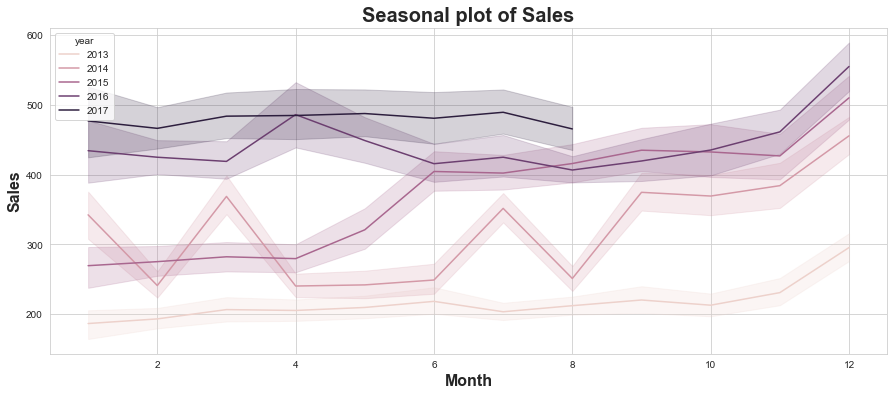

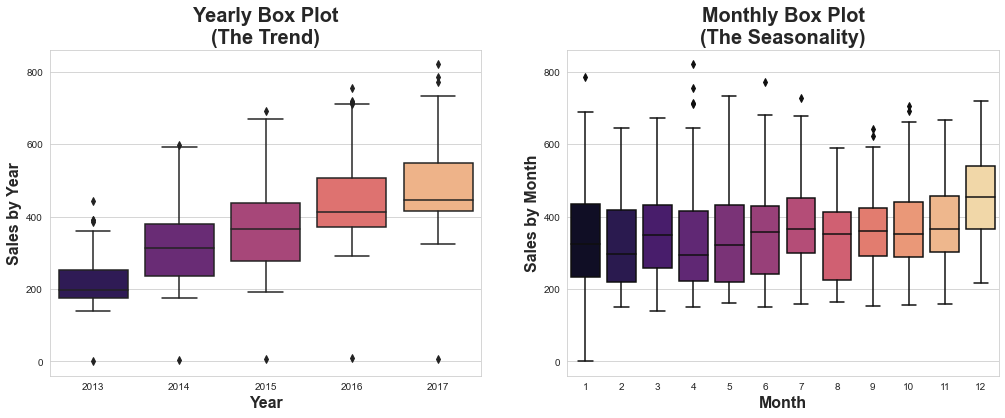

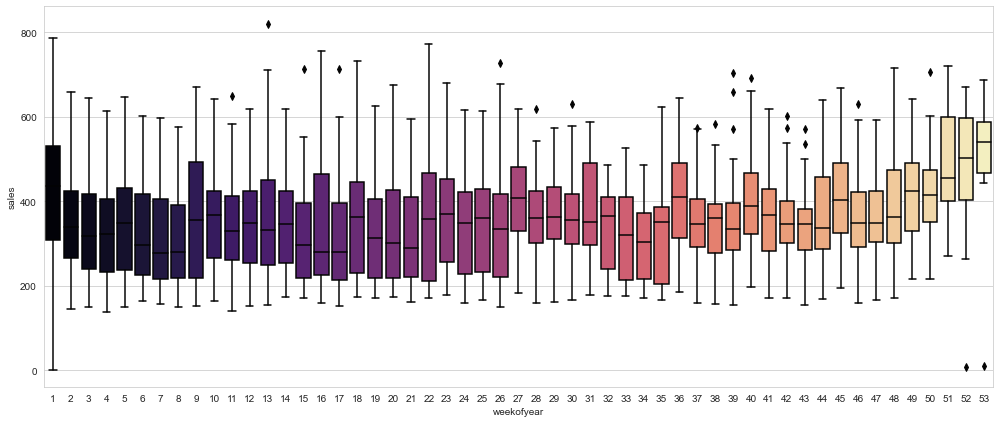

In [73]:
variable = 'sales'
fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("magma", as_cmap=True)
sns.lineplot(df_sesonality['month'], df_sesonality[variable], hue=df_sesonality['year'])
ax.set_title('Seasonal plot of Sales', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Sales', fontsize = 16, fontdict=dict(weight='bold'))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(17, 6))

sns.boxplot(df_sesonality['year'], df_sesonality[variable], palette="magma",ax=ax[0])
ax[0].set_title('Yearly Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Sales by Year', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(df_sesonality['month'], df_sesonality[variable], palette="magma", ax=ax[1])
ax[1].set_title('Monthly Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Sales by Month', fontsize = 16, fontdict=dict(weight='bold'))

#plot boxplots for every week of the year
fig = plt.figure(figsize=(17,7))
sns.boxplot(df_sesonality['weekofyear'], df_sesonality['sales'], palette="magma")


In [74]:
df_plot = pd.merge(holidays_events, train_aux, on='date', how='inner')
df_plot.loc[df_plot['description'].isin(['Black Friday', 'Cyber Monday']), 'type'] = 'black_friday_cyber_monday'

In [75]:
fig = px.scatter(df_plot, x="date", y="sales", size='sales', color='type')
                 #size='sales', color='sales',
                  #color_continuous_scale="pinkyl")

fig.update_layout({"title": f'Avg Sales on Holiday Events days',
                   "xaxis": {"title":"HOLIDAY EVENT DATE"},
                   "yaxis": {"title":"Avg Sales"},
                   "showlegend": True})

fig.add_annotation(x='2014-07-05',y=500,xref="x",yref="y",text="WORLD CUP",showarrow=True, align="center",arrowhead=2,arrowsize=1,
        arrowwidth=2,arrowcolor="#636363",ax=0,ay=-30,bordercolor="#c7c7c7",borderwidth=2,borderpad=4,bgcolor="#ca8ee8",opacity=0.8  )

fig.add_annotation(x='2016-04-20',y=800,xref="x",yref="y",text="EARTHQUAKE",showarrow=True,align="center",arrowhead=2,arrowsize=1,
        arrowwidth=2,arrowcolor="#636363",ax=0,ay=-30,bordercolor="#c7c7c7",borderwidth=2,borderpad=4,bgcolor="#ca8ee8",opacity=0.8)

fig.add_annotation(x='2013-12-30',y=200,xref="x",yref="y",text="CHRISTMAS 13/14",showarrow=True,align="center",arrowhead=2,arrowsize=1,
        arrowwidth=2,arrowcolor="#636363",ax=0,ay=30,bordercolor="#c7c7c7",borderwidth=2,borderpad=4,bgcolor="#3ce685",opacity=0.8)


fig.add_annotation(x='2014-12-30',y=200,xref="x",yref="y",text="CHRISTMAS 14/15",showarrow=True,align="center",arrowhead=2,arrowsize=1,
        arrowwidth=2,arrowcolor="#636363",ax=0,ay=30,bordercolor="#c7c7c7",borderwidth=2,borderpad=4,bgcolor="#3ce685",opacity=0.8)


fig.add_annotation(x='2015-12-30',y=200,xref="x",yref="y",text="CHRISTMAS 15/16",showarrow=True,align="center",arrowhead=2,arrowsize=1,
        arrowwidth=2,arrowcolor="#636363",ax=0,ay=30,bordercolor="#c7c7c7",borderwidth=2,borderpad=4,bgcolor="#3ce685",opacity=0.8)


fig.add_annotation(x='2016-12-30',y=200,xref="x",yref="y",text="CHRISTMAS 16/17",showarrow=True,align="center",arrowhead=2,arrowsize=1,
        arrowwidth=2,arrowcolor="#636363",ax=0,ay=30,bordercolor="#c7c7c7",borderwidth=2,borderpad=4,bgcolor="#3ce685",opacity=0.8)



fig.show()

### Comments

* In the above chart can be seen the average increasing trend in sales.

* Clearly shows the two zones with purple bubbles on consecutive days. Check the description column, it can be clearly seen that the purple bubbles of June 2014 correspond to the Football World Cup of Brazil and the purple bubbles of Apr 2016 correspond to days off given by the goverment due to the earthquake. During these two events, the sales went up.The majority of light green bubles at the end of every year correspond to Christmas celebrations (in December). During this time, people gather togeteher and spend money on quality food and presents for Christmas gathering these days the avg amount spent is he highest for each year.

